In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arqs = os.listdir('../dados')

In [3]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

#### Aula 1 - Análise abstracts

In [4]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

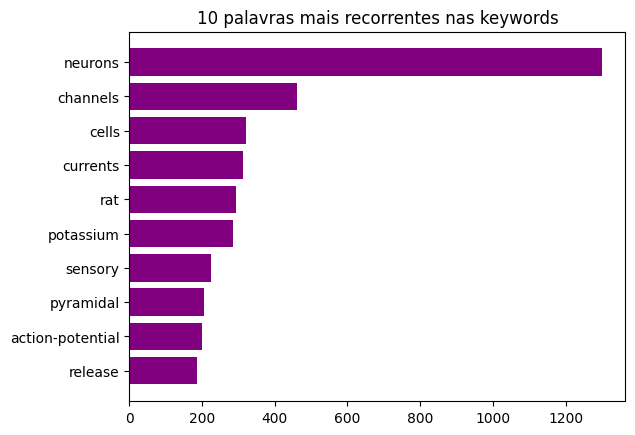

In [5]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')
plt.show()

#### Aula 2

#####  Extração dos valores em ms

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [26]:
limite = 20
count = 0
lista_vals,abs_vals = [],[]

for abs_index,abstract in enumerate(df['Abstract']):
        
    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])

In [8]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [9]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 348


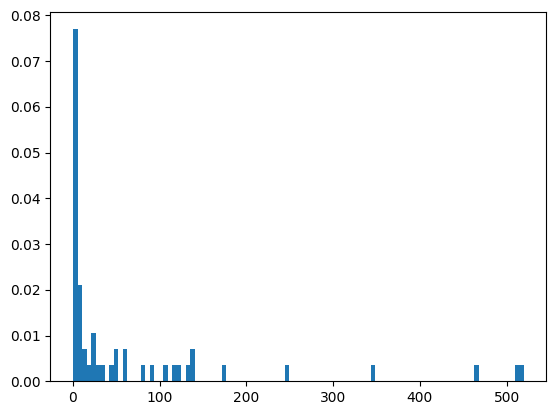

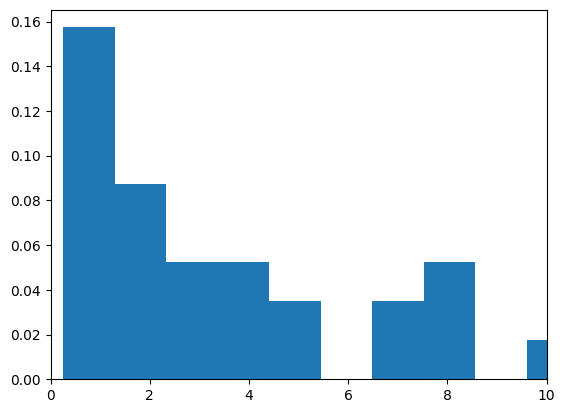

In [10]:
plt.hist(inf,bins=100,density=True)
plt.show()
plt.hist(inf,bins=500,density=True)
plt.xlim(0,10)
plt.show()

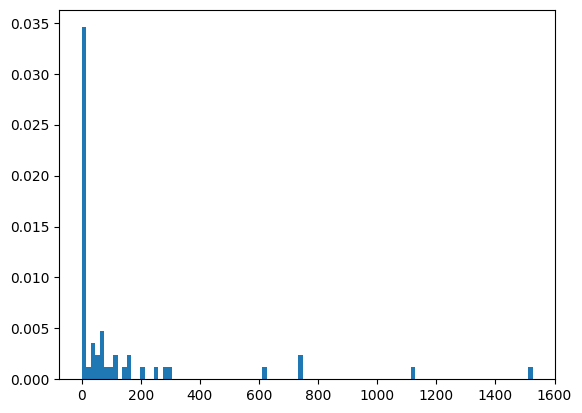

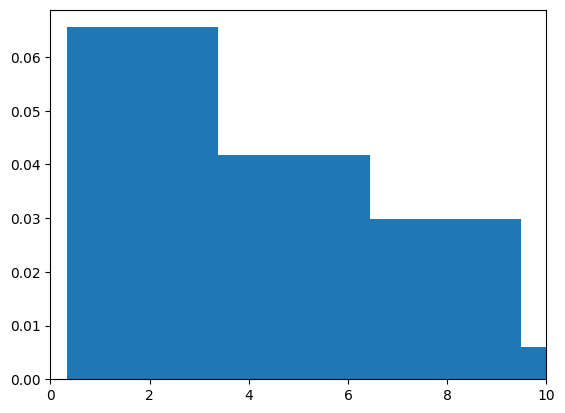

In [11]:
plt.hist(sup,bins=100,density=True)
plt.show()
plt.hist(sup,bins=500,density=True)
plt.xlim(0,10)
plt.show()

##### NER

In [12]:
for ms_index in ms_indexes:
    doc_aux = doc[ms_index-9:ms_index+7]
    doc_aux = nlp(str(doc_aux))

In [13]:
doc = nlp(doc_aux)

In [14]:
doc

Fast spikes spontaneously fired last 2.8 +/- 0.6 ms (mean +/- S.D.)

In [15]:
[(t.text, t.ent_type_) for t in doc]

[('Fast', ''),
 ('spikes', ''),
 ('spontaneously', ''),
 ('fired', ''),
 ('last', 'DATE'),
 ('2.8', 'DATE'),
 ('+', 'DATE'),
 ('/-', ''),
 ('0.6', 'CARDINAL'),
 ('ms', ''),
 ('(', ''),
 ('mean', ''),
 ('+', ''),
 ('/-', ''),
 ('S.D.', ''),
 (')', '')]

In [16]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [17]:
displacy.render(doc, style='dep', jupyter=True)

In [18]:
[(t.text, t.dep_) for t in doc]

[('Fast', 'amod'),
 ('spikes', 'nsubj'),
 ('spontaneously', 'advmod'),
 ('fired', 'ROOT'),
 ('last', 'amod'),
 ('2.8', 'nummod'),
 ('+', 'punct'),
 ('/-', 'punct'),
 ('0.6', 'nummod'),
 ('ms', 'dobj'),
 ('(', 'punct'),
 ('mean', 'nmod'),
 ('+', 'nmod'),
 ('/-', 'punct'),
 ('S.D.', 'appos'),
 (')', 'punct')]

In [19]:
[(t.text, t.dep_, t.head.text) for t in doc]

[('Fast', 'amod', 'spikes'),
 ('spikes', 'nsubj', 'fired'),
 ('spontaneously', 'advmod', 'fired'),
 ('fired', 'ROOT', 'fired'),
 ('last', 'amod', '2.8'),
 ('2.8', 'nummod', 'ms'),
 ('+', 'punct', '2.8'),
 ('/-', 'punct', '2.8'),
 ('0.6', 'nummod', 'ms'),
 ('ms', 'dobj', 'fired'),
 ('(', 'punct', 'ms'),
 ('mean', 'nmod', 'S.D.'),
 ('+', 'nmod', 'S.D.'),
 ('/-', 'punct', 'S.D.'),
 ('S.D.', 'appos', 'ms'),
 (')', 'punct', 'ms')]

#### Aula 3

In [30]:
list(df['Abstract'])[1006]

'In cortical pyramidal neurons, backpropagating action potentials (bAPs) supply Ca2+ to synaptic contacts on dendrites. To determine whether the efficacy of AP backpropagation into apical tuft dendrites is stable over time, we performed dendritic Ca2+ and voltage imaging in rat brain slices. We found that the amplitude of bAP-Ca2+ in apical tuft branches was unstable, given that it varied from trial to trial (termed bAP-Ca2+ flickering). Small perturbations in dendritic physiology, such as spontaneous synaptic inputs, channel inactivation, or temperature-induced changes in channel kinetics, can cause bAP flickering. In the tuft branches, the density of Na+ and K+ channels was sufficient to support local initiation of fast spikelets by glutamate iontophoresis. We quantified the time delay between the somatic AP burst and the peak of dendritic Ca2+ transient in the apical tuft, because this delay is important for induction of spike-timing dependent plasticity. Depending on the frequency 

#### Aula 4

In [4]:
abst = list(df['Abstract'].copy())
corpus = []

for abstract in abst:
    if str(abstract) != 'nan':
        corpus.append(abstract)

In [5]:
vectorizer = CountVectorizer()

NameError: name 'CountVectorizer' is not defined

In [ ]:
bow = vectorizer.fit_transform(corpus)
print(bow)
print(type(bow))

In [96]:
print(vectorizer.get_feature_names_out())

vectorizer.vocabulary_

['00' '000' '0001' ... 'zoster' 'zucapsaicin' 'zucker']


{'the': 13688,
 'neuropeptide': 9249,
 'red': 11597,
 'pigment': 10535,
 'concentrating': 3187,
 'hormone': 6511,
 'rpch': 12114,
 'strengthened': 13128,
 'inhibitory': 7086,
 'synapse': 13451,
 'from': 5810,
 'lateral': 7823,
 'pyloric': 11314,
 'lp': 8099,
 'neuron': 9236,
 'to': 13838,
 'dilator': 4236,
 'pd': 10219,
 'neurons': 9243,
 'in': 6918,
 'network': 9166,
 'of': 9665,
 'stomatogastric': 13100,
 'ganglion': 5895,
 'stg': 13074,
 'lobster': 8032,
 'homarus': 6486,
 'americanus': 1347,
 'produced': 11042,
 'several': 12488,
 'fold': 5713,
 'increases': 6964,
 'amplitude': 1399,
 'both': 2281,
 'action': 1011,
 'potential': 10816,
 'mediated': 8395,
 'and': 1449,
 'non': 9408,
 'impulse': 6914,
 'transmission': 13997,
 'that': 13685,
 'persisted': 10362,
 'for': 5729,
 'as': 1721,
 'long': 8065,
 'peptide': 10272,
 'remained': 11728,
 'present': 10946,
 'because': 2055,
 'is': 7455,
 'only': 9725,
 'feedback': 5503,
 'pacemaker': 10029,
 'kernel': 7634,
 'which': 14793,
 'cons

In [97]:
nlp = spacy.load('en_core_web_sm')

def spacy_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct]

NameError: name 'spacy' is not defined

In [ ]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, lowercase=False, binary=True)
bow = vectorizer.fit_transform(corpus)
print(bow)

#### Aula 5

In [4]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro220068\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro220068\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
abstracts = list()
for abst in df['Abstract']:
    if str(abst) != 'nan':
        abst = word_tokenize(abst)
        filtered_words = [word for word in abst if word.lower() not in stop_words]
        filtered_text = ' '.join(filtered_words)
        abstracts.append(str(filtered_text))

In [8]:
titles = list()
for tls,abst in zip(df['Article Title'],df['Abstract']):
    if str(abst) != 'nan':
        titles.append(str(tls))

In [9]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(abstracts)
words = tfidf.get_feature_names_out()
print(csr_mat)

  (0, 5444)	0.026815200936463453
  (0, 12678)	0.028327558454713835
  (0, 12947)	0.06586786497766803
  (0, 6316)	0.046852336767609526
  (0, 8294)	0.020426437001260463
  (0, 3213)	0.031523746055279744
  (0, 9709)	0.06408620989549463
  (0, 8711)	0.033030113963519486
  (0, 12035)	0.02585773164112573
  (0, 7975)	0.0359322605385131
  (0, 4688)	0.020983892756674307
  (0, 4519)	0.0518441495005143
  (0, 13721)	0.028800145189256204
  (0, 1020)	0.0348117690456929
  (0, 14136)	0.0448407405252456
  (0, 10372)	0.04630930549107497
  (0, 11796)	0.0748219023822352
  (0, 5165)	0.04604870208913998
  (0, 1299)	0.019602663383521842
  (0, 99)	0.022663221789456792
  (0, 12578)	0.024548785567137875
  (0, 3217)	0.036593424127866314
  (0, 13717)	0.03980358177859766
  (0, 2739)	0.04835870467584927
  (0, 6983)	0.056530560864847715
  :	:
  (1554, 5410)	0.04562596133842228
  (1554, 7655)	0.03799033440629572
  (1554, 5578)	0.09253761101046168
  (1554, 4334)	0.05812889208048957
  (1554, 3584)	0.042315825574658565
  (

In [10]:
print(tfidf.vocabulary_)

{'neuropeptide': 9212, 'red': 11553, 'pigment': 10491, 'concentrating': 3174, 'hormone': 6480, 'rpch': 12070, 'strengthened': 13081, 'inhibitory': 7053, 'synapse': 13403, 'lateral': 7787, 'pyloric': 11270, 'lp': 8063, 'neuron': 9199, 'dilator': 4221, 'pd': 10175, 'neurons': 9206, 'network': 9129, 'stomatogastric': 13053, 'ganglion': 5872, 'stg': 13027, 'lobster': 7996, 'homarus': 6455, 'americanus': 1344, 'produced': 10998, 'several': 12443, 'fold': 5692, 'increases': 6931, 'amplitude': 1396, 'action': 1010, 'potential': 10772, 'mediated': 8359, 'non': 9371, 'impulse': 6881, 'transmission': 13940, 'persisted': 10318, 'long': 8029, 'peptide': 10228, 'remained': 11684, 'present': 10902, 'feedback': 5483, 'pacemaker': 9985, 'kernel': 7598, 'consists': 3308, 'electrically': 4734, 'coupled': 3529, 'two': 14124, 'anterior': 1504, 'burster': 2381, 'ab': 858, 'might': 8584, 'expected': 5272, 'strengthening': 13082, 'would': 14798, 'increase': 6929, 'period': 10275, 'rhythm': 11957, 'however': 

In [10]:
df_tf_idf = pd.DataFrame(csr_mat.toarray(), columns = words)
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucapsaicin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def TF_IDF_func_presrntation(Num):
    DF = df_tf_idf.T[Num].nlargest(10)
    print( 'Doc number ' , Num+1)
    print( 30*'-')
    return DF

In [13]:
print(TF_IDF_func_presrntation(1000))

Doc number  1001
------------------------------
scn          0.527000
sleep        0.318241
wake         0.274676
type         0.218021
discharge    0.207468
profiles     0.193054
ii           0.175495
iii          0.162260
located      0.151395
mainly       0.151395
Name: 1000, dtype: float64


In [12]:
svd = TruncatedSVD(n_components=10)
lsa = svd.fit_transform(csr_mat)

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,Red pigment concentrating hormone strongly enh...,0.104655,-0.037580,-0.004058,-0.045966,0.012370,-0.010498,0.040636,0.004164,-0.023848,-0.006081
1,Sustained activation of hippocampal Lp-type vo...,0.207244,0.051622,-0.039837,-0.014923,0.125321,-0.153484,0.077658,-0.079315,0.004362,0.009328
2,Decreased Spire2 Expression is Involved in Epi...,0.111222,-0.058765,-0.007904,-0.028319,0.043128,-0.015977,0.000115,-0.031681,0.023405,-0.033143
3,Inhibition of transient and persistent Na+ cur...,0.265180,0.019228,0.009956,0.133409,-0.042477,0.045296,0.088630,-0.037884,-0.015696,-0.078264
4,Serotonin directly increases a calcium current...,0.266776,0.112770,-0.020619,-0.003870,0.053209,0.006454,0.233532,0.211158,0.016987,-0.081792
...,...,...,...,...,...,...,...,...,...,...,...
1550,Electrophysiological and morphological propert...,0.225389,-0.103261,-0.040054,0.021466,-0.040004,-0.112158,-0.189103,0.083760,-0.035769,-0.086005
1551,Kv3 channels:: voltage-gated K+ channels desig...,0.201192,0.038177,-0.075418,0.088174,0.139841,-0.181159,0.050146,-0.062883,0.062313,0.100160
1552,PROPERTIES AND IONIC BASIS OF THE ACTION-POTEN...,0.364683,0.208540,-0.099552,0.003969,-0.140946,0.083471,-0.074326,-0.037740,0.139474,0.135669
1553,Treatment of myotonia congenita with retigabin...,0.134861,-0.051052,-0.017939,0.008744,0.123250,0.053369,0.044367,-0.037547,0.031915,-0.046884


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
00,0.000225,-0.000263,0.000380,0.000027,-0.000612,0.000707,0.000262,0.000131,0.002448,0.002109
000,0.002432,0.000326,-0.001140,-0.000949,0.002178,0.004482,-0.002306,-0.001388,-0.000989,0.000045
0001,0.002308,-0.007783,-0.002530,-0.004356,0.017609,0.022277,-0.000451,-0.009275,0.012357,-0.016452
00011,0.000310,-0.000344,-0.000018,0.000949,0.000282,-0.000184,-0.000877,0.000358,0.000514,-0.000576
0002,0.000082,-0.000098,0.000102,-0.000193,0.000193,0.000065,-0.000176,0.000009,0.000199,-0.000199
...,...,...,...,...,...,...,...,...,...,...
zone,0.002488,-0.003637,-0.001312,-0.002206,-0.001328,0.000658,-0.001126,-0.003679,-0.005201,0.004175
zones,0.003458,-0.006445,-0.000194,-0.007422,0.004561,-0.000564,-0.001469,-0.002699,-0.001683,0.011423
zoster,0.000134,-0.000720,0.000008,-0.000644,0.001417,0.001904,0.000158,-0.000498,0.000045,-0.000157
zucapsaicin,0.000100,-0.000085,0.000272,0.000106,0.000111,0.000358,0.000284,-0.000217,0.000397,0.000429


In [14]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_1", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
neurons,0.239789,0.191532,0.059724,0.129094,0.010709,0.192590,0.306547,0.257865,0.052710,0.237857
ca2,0.199896,0.643262,0.034619,0.399618,0.074481,0.145006,0.323520,0.063088,0.117672,0.063368
current,0.189777,0.098495,0.086452,0.285608,0.072446,0.130221,0.108073,0.025250,0.155613,0.081487
potential,0.147359,0.025816,0.042694,0.021175,0.014519,0.024097,0.031847,0.017828,0.004368,0.001039
action,0.146358,0.017173,0.037121,0.016978,0.000133,0.012043,0.030343,0.011944,0.023833,0.005219
...,...,...,...,...,...,...,...,...,...,...
audiogram,0.000035,0.000059,0.000016,0.000068,0.000026,0.000078,0.000050,0.000006,0.000002,0.000078
cuts,0.000035,0.000059,0.000016,0.000068,0.000026,0.000078,0.000050,0.000006,0.000002,0.000078
hopeful,0.000031,0.000157,0.000002,0.000114,0.000345,0.000347,0.000027,0.000118,0.000168,0.000216
interventional,0.000031,0.000157,0.000002,0.000114,0.000345,0.000347,0.000027,0.000118,0.000168,0.000216


In [15]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_2", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
ca2,0.199896,6.432625e-01,0.034619,0.399618,0.074481,0.145006,0.323520,0.063088,0.117672,0.063368
neurons,0.239789,1.915317e-01,0.059724,0.129094,0.010709,0.192590,0.306547,0.257865,0.052710,0.237857
channels,0.128024,1.804584e-01,0.047409,0.042834,0.257645,0.228208,0.044555,0.171179,0.084012,0.031255
voltage,0.117223,1.176416e-01,0.043194,0.150177,0.025091,0.016392,0.092312,0.021842,0.085421,0.027970
stimulation,0.074112,1.059631e-01,0.009334,0.139789,0.023738,0.120591,0.024186,0.033797,0.170875,0.194157
...,...,...,...,...,...,...,...,...,...,...
homooligomer,0.000353,3.878552e-07,0.000277,0.000477,0.001106,0.001551,0.000177,0.000067,0.000410,0.000445
transneuronal,0.000109,3.138525e-07,0.000165,0.000102,0.000298,0.000095,0.000380,0.000163,0.000204,0.000392
inhaled,0.000109,3.138525e-07,0.000165,0.000102,0.000298,0.000095,0.000380,0.000163,0.000204,0.000392
congenital,0.001303,2.338079e-07,0.000246,0.001211,0.004577,0.003657,0.000059,0.003544,0.001363,0.001941


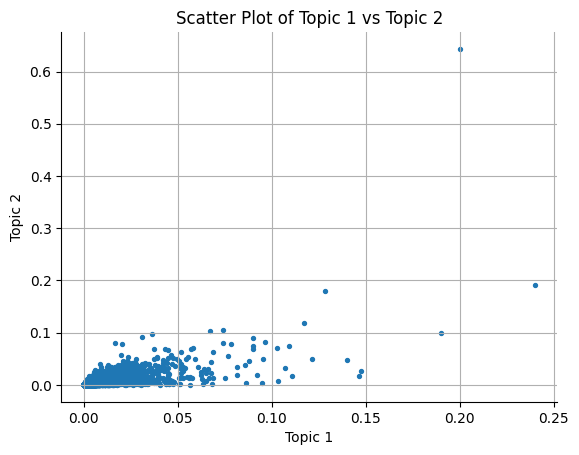

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(list(encoding_matrix["topic_1"]), list(encoding_matrix["topic_2"]), s=8)

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

# plt.xlim(min(x_plot)-0.001,max(x_plot)+0.001)
# plt.xlim(min(x_plot),max(x_plot))

# plt.ylim(min(y_plot)-0.001,max(y_plot)+0.001)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid()

plt.show()

In [19]:
import itertools

In [20]:
combs = list(itertools.combinations(["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],2))

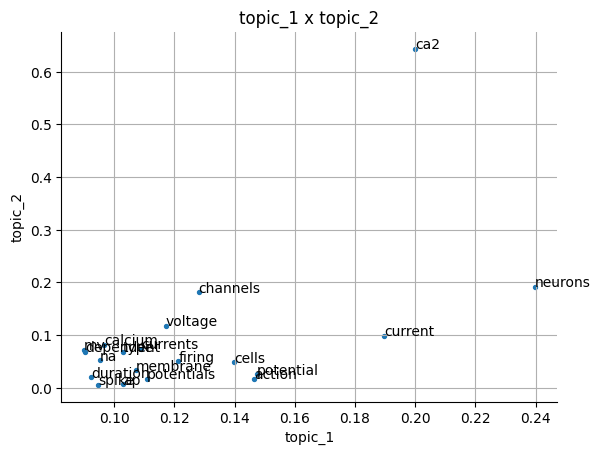

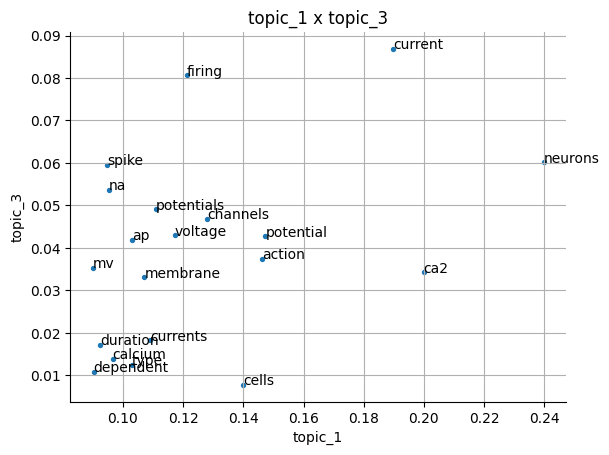

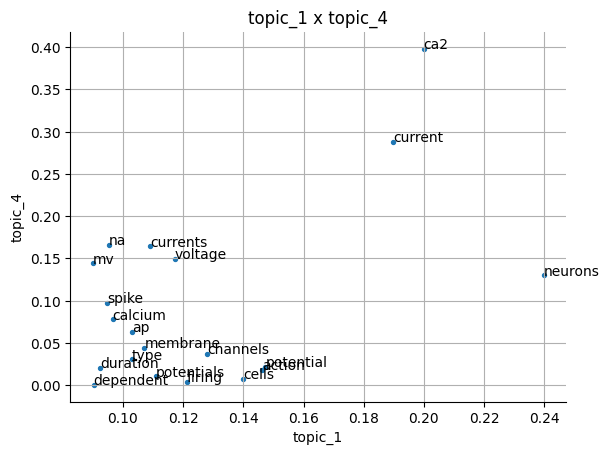

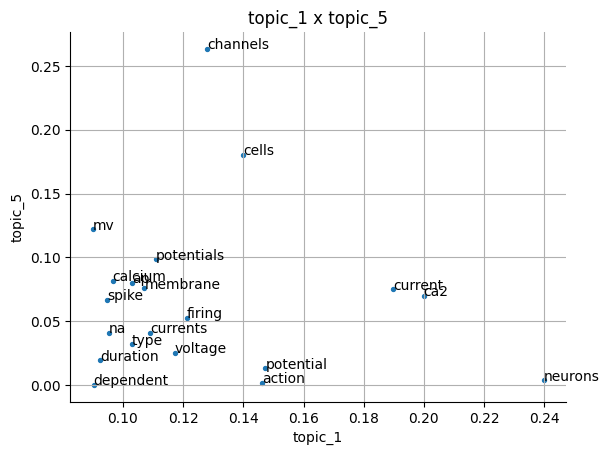

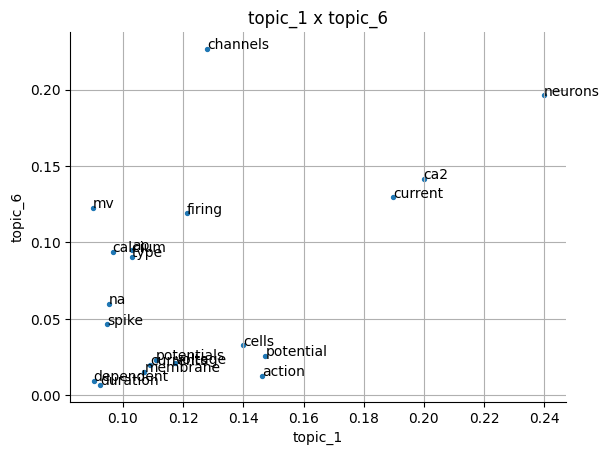

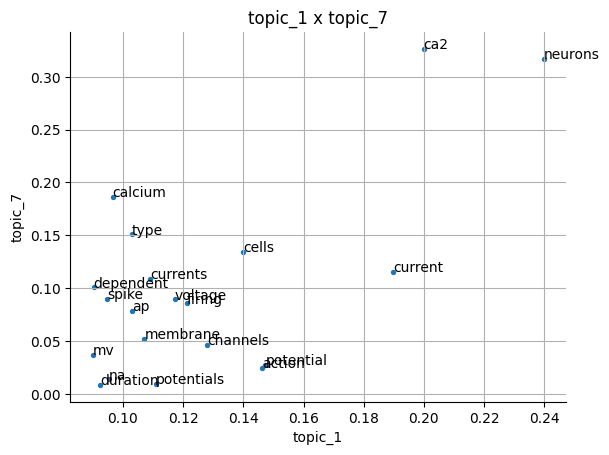

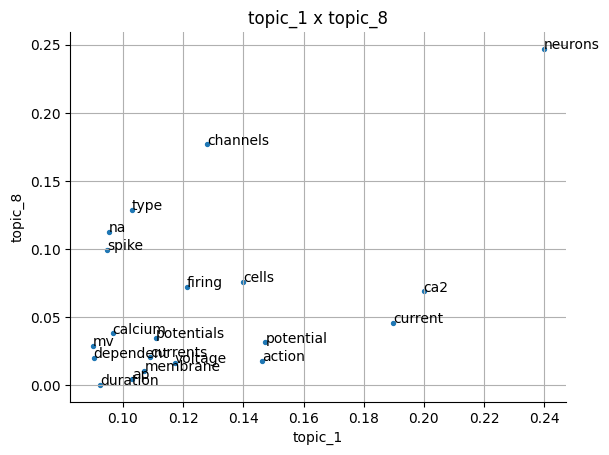

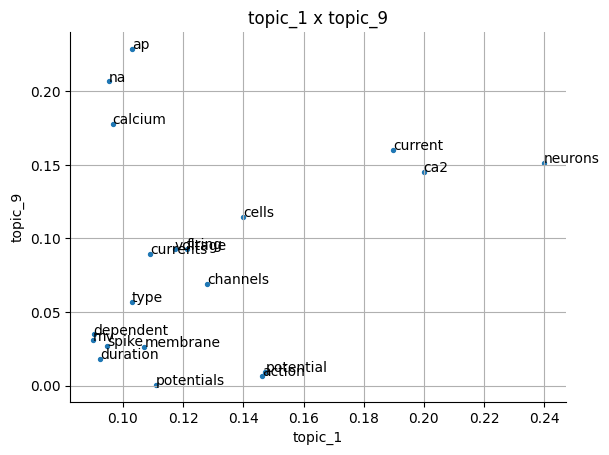

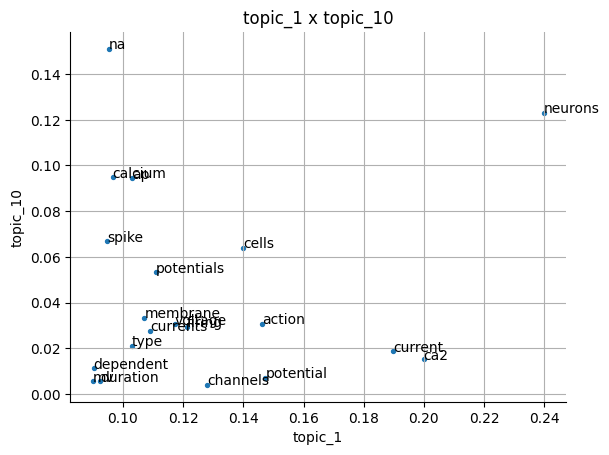

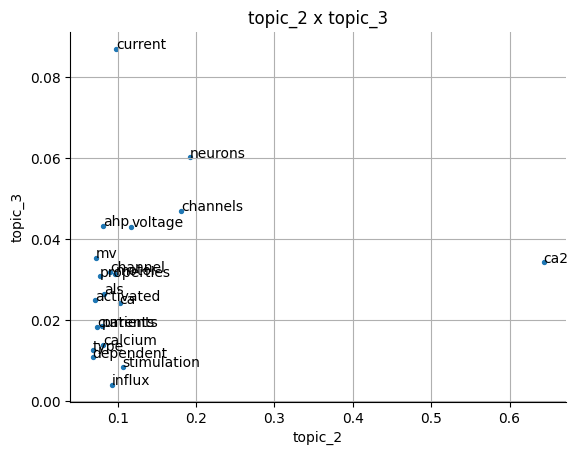

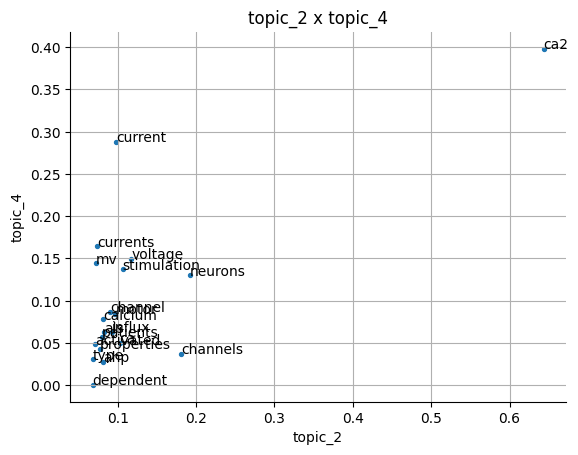

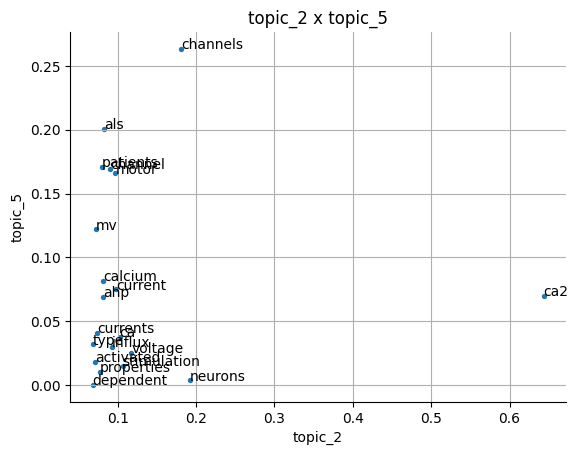

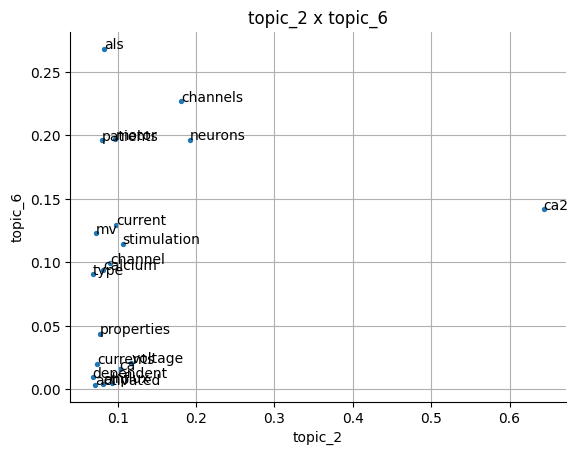

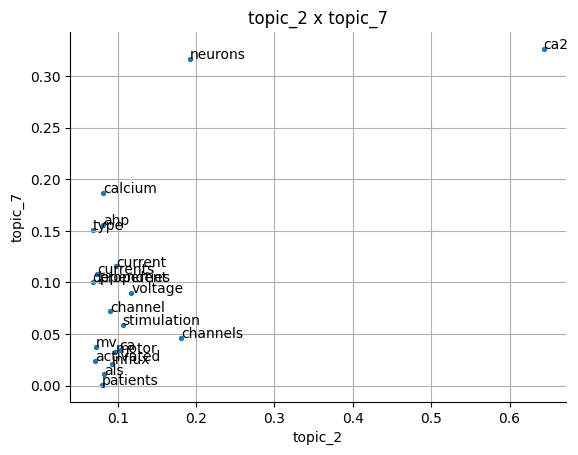

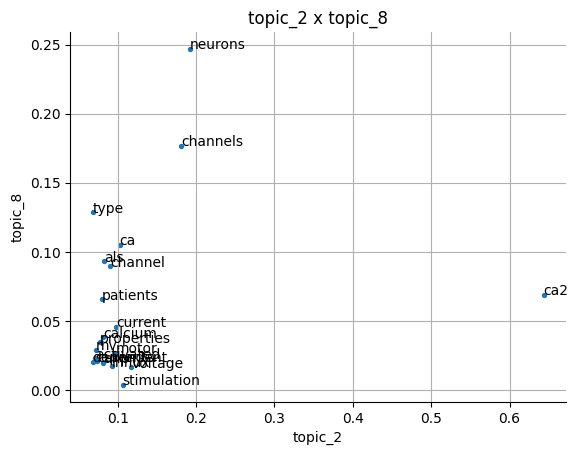

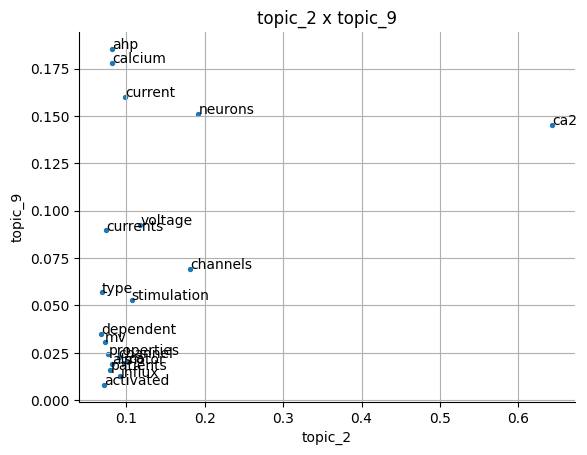

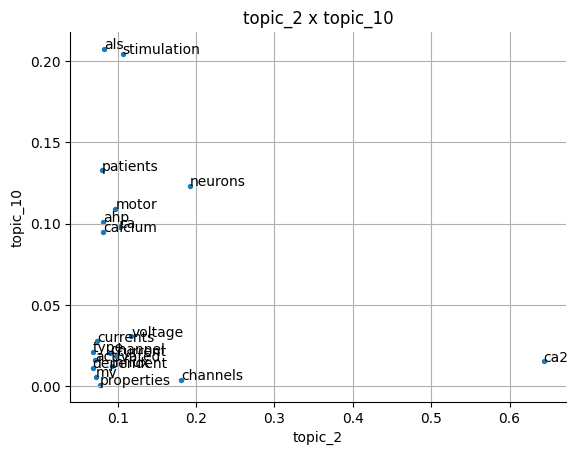

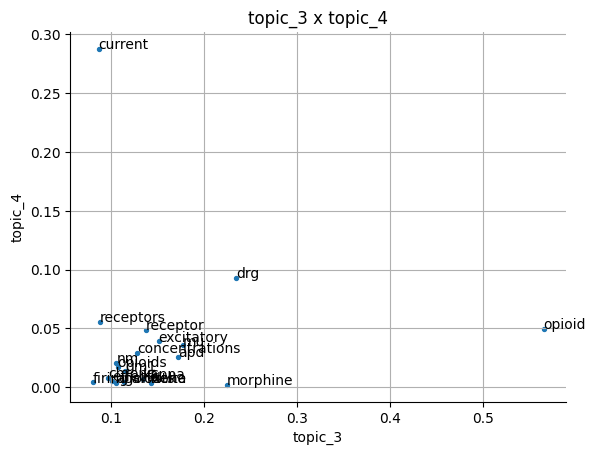

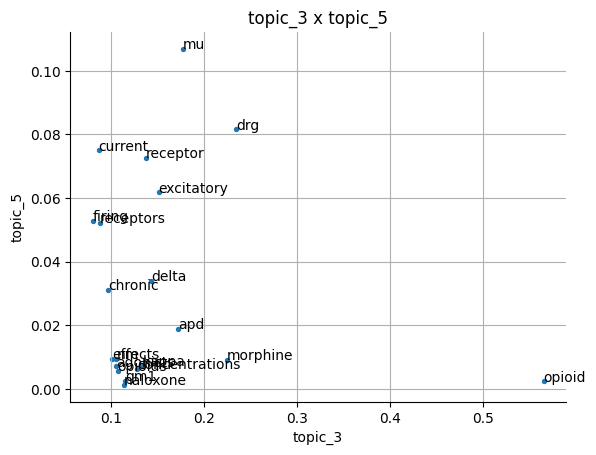

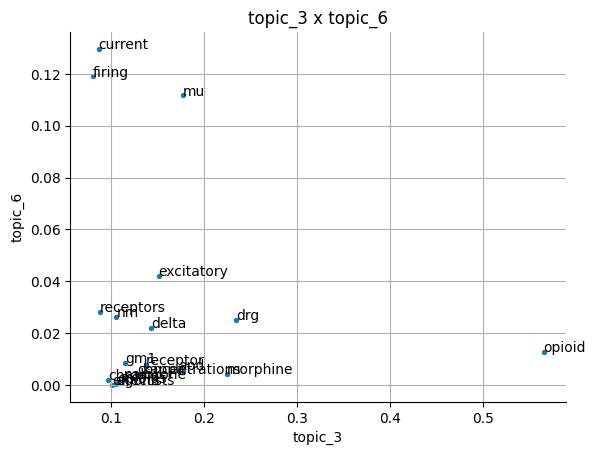

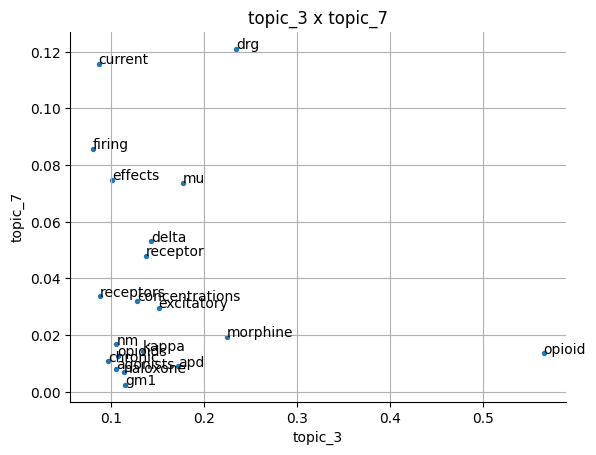

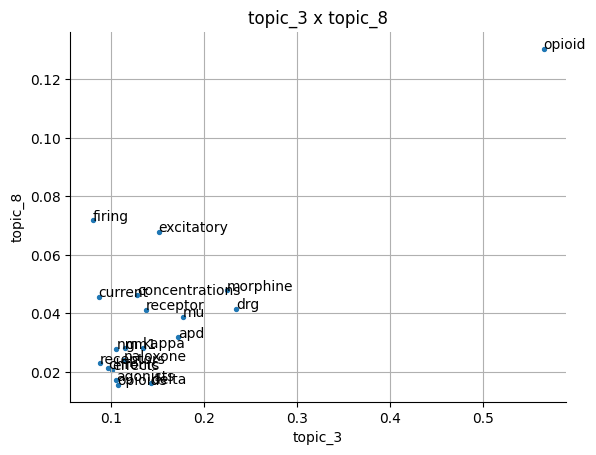

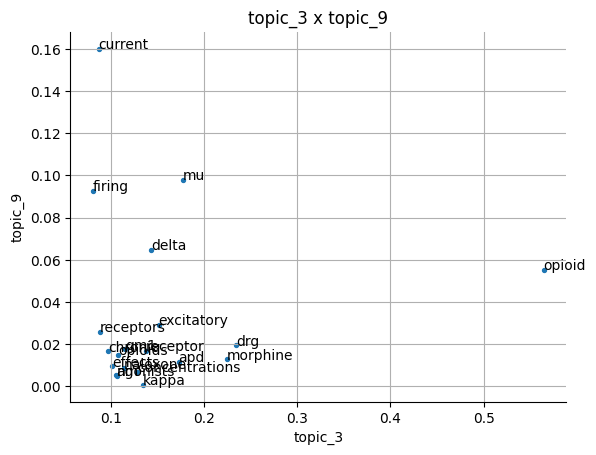

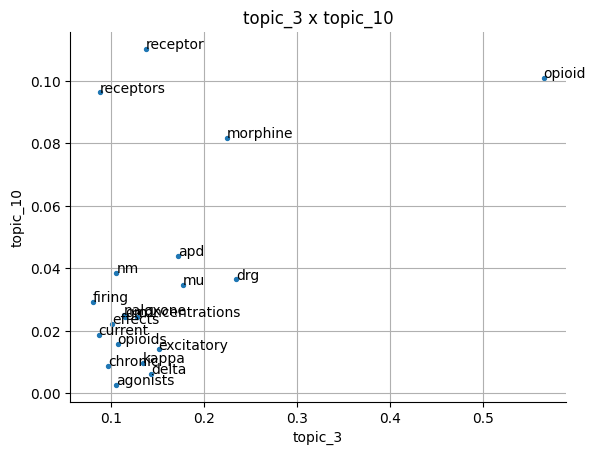

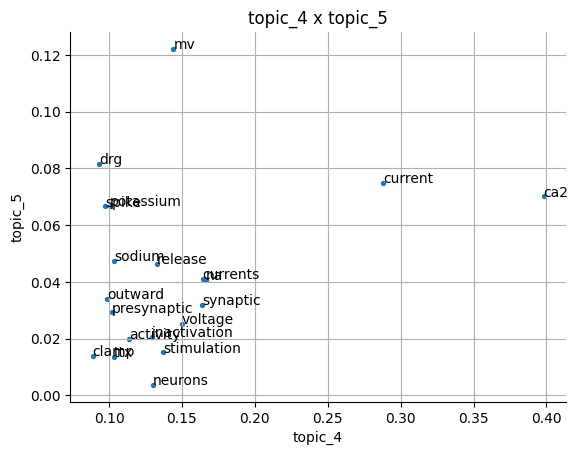

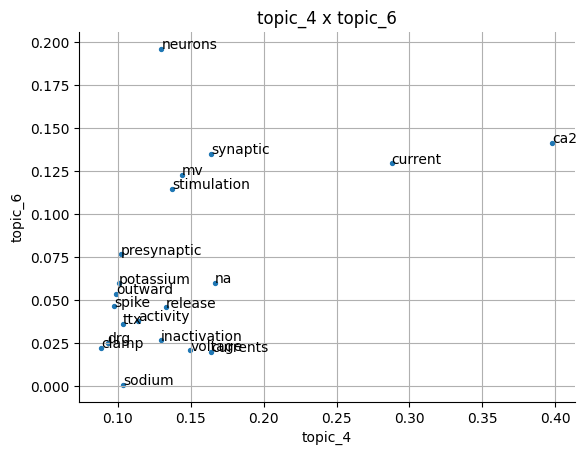

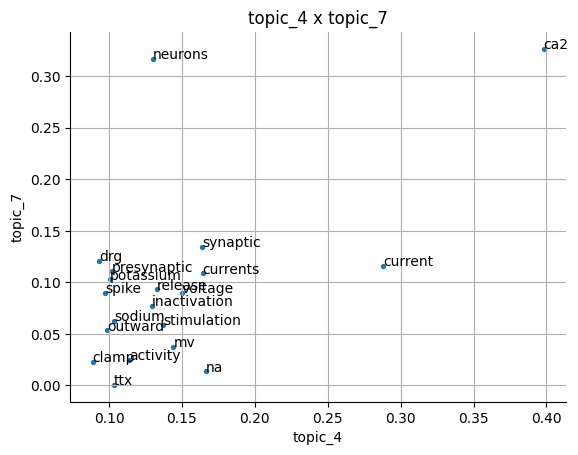

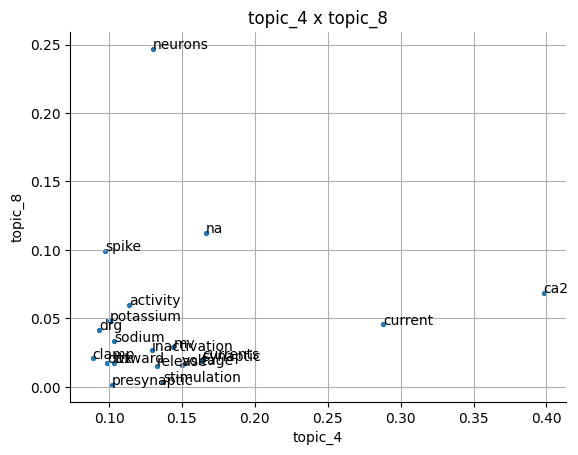

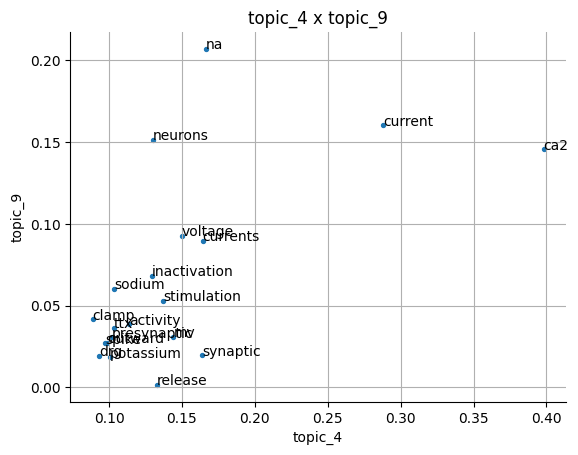

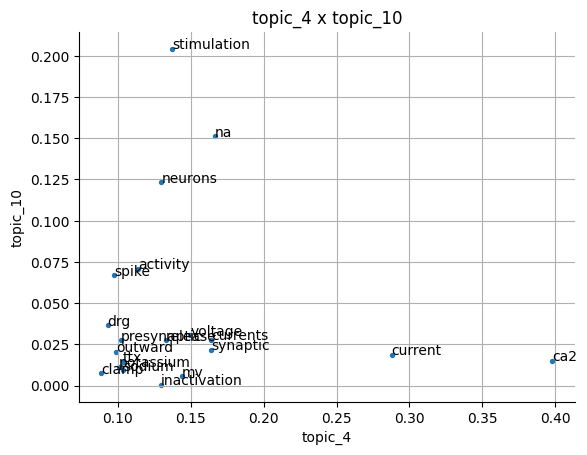

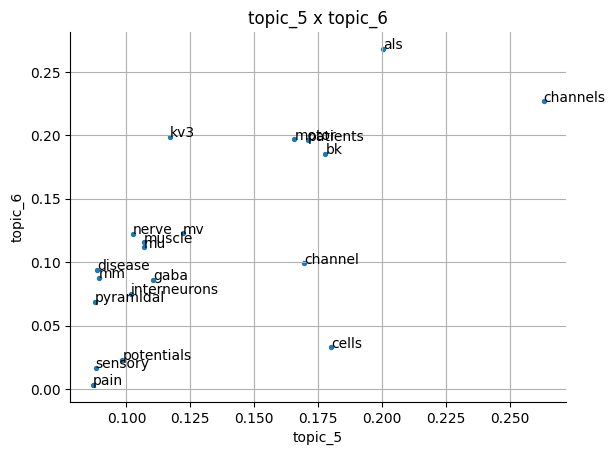

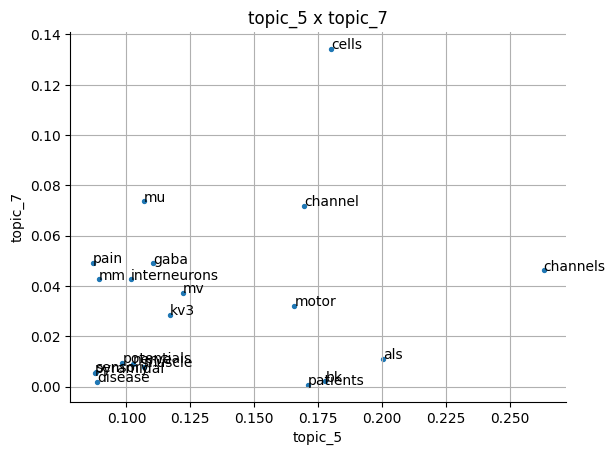

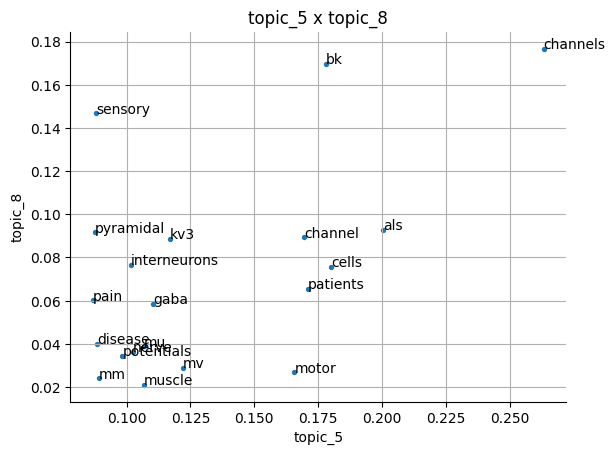

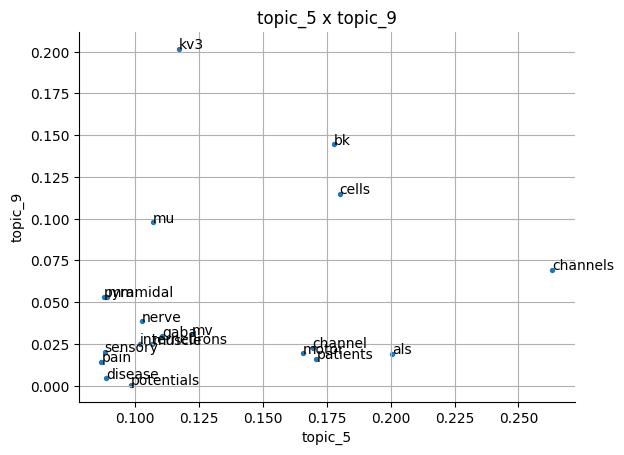

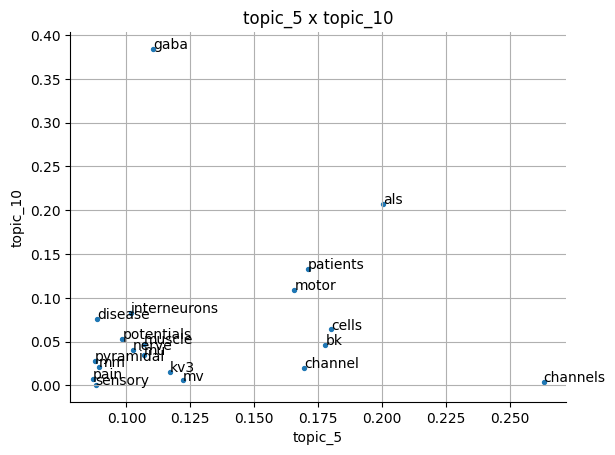

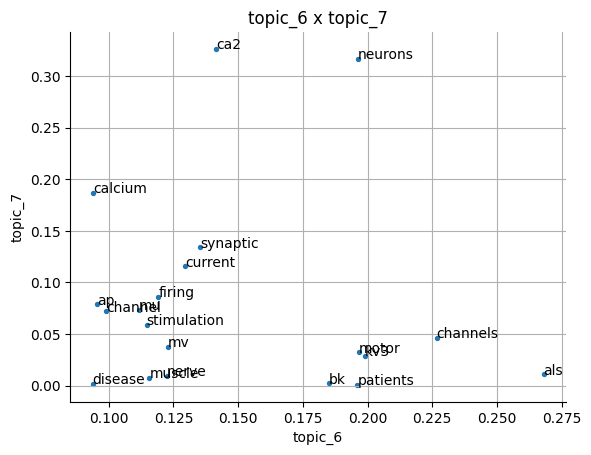

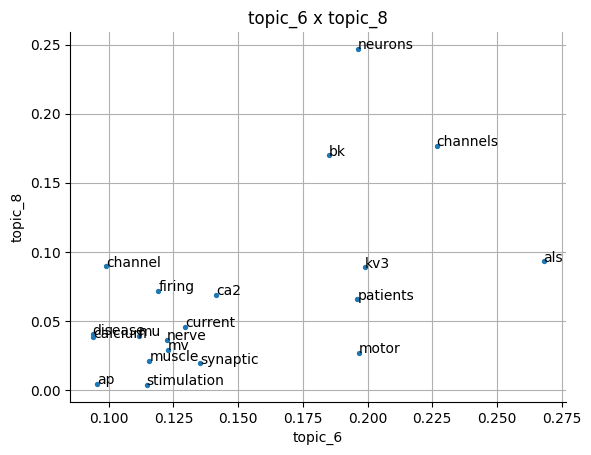

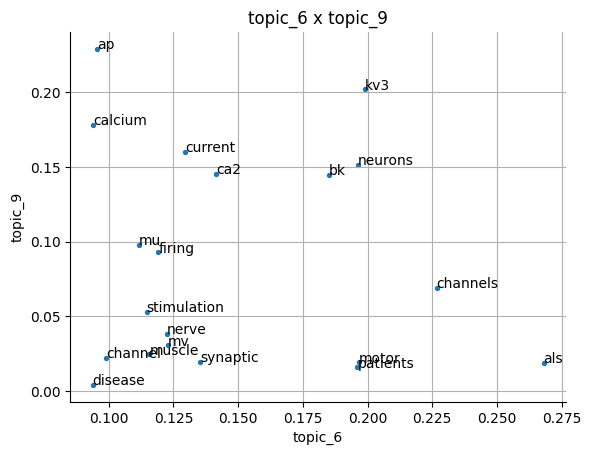

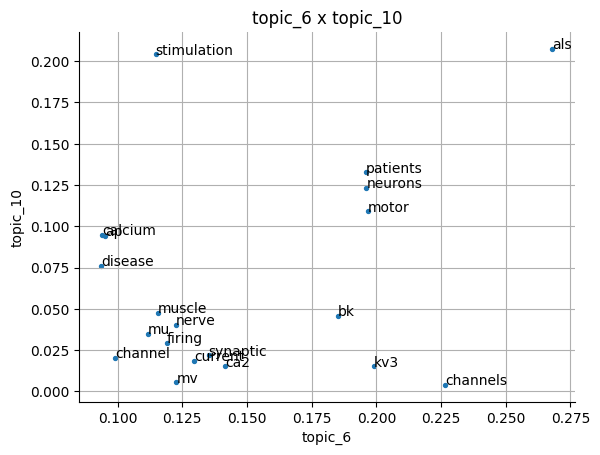

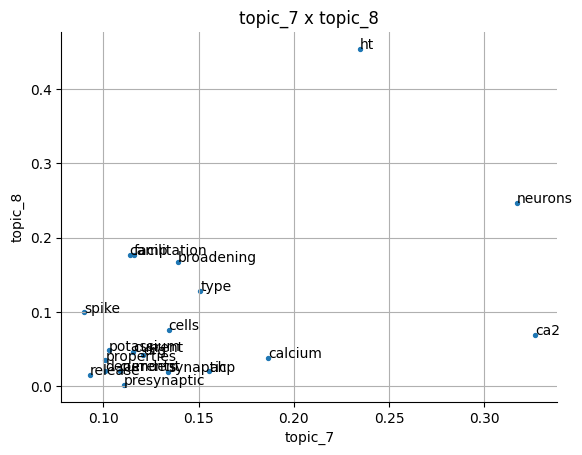

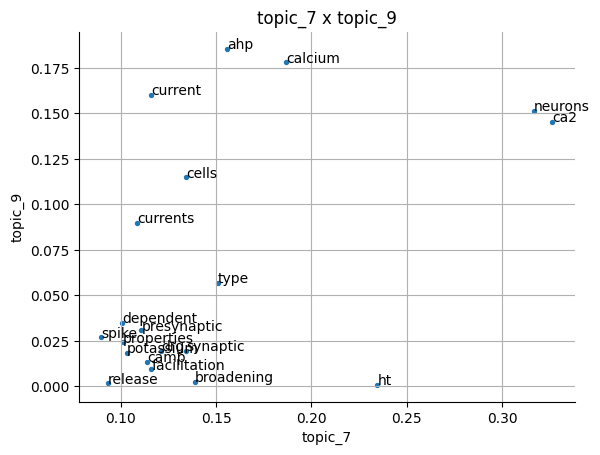

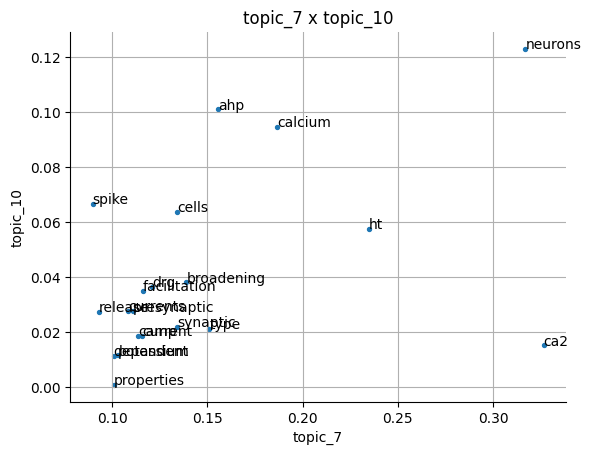

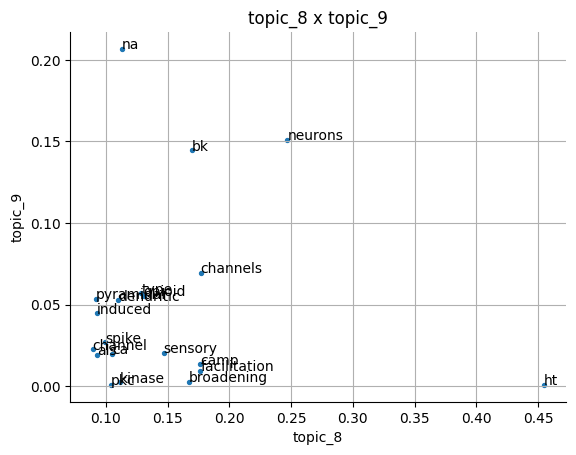

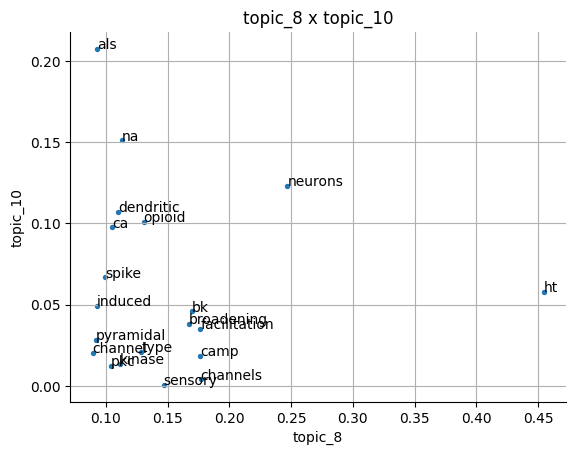

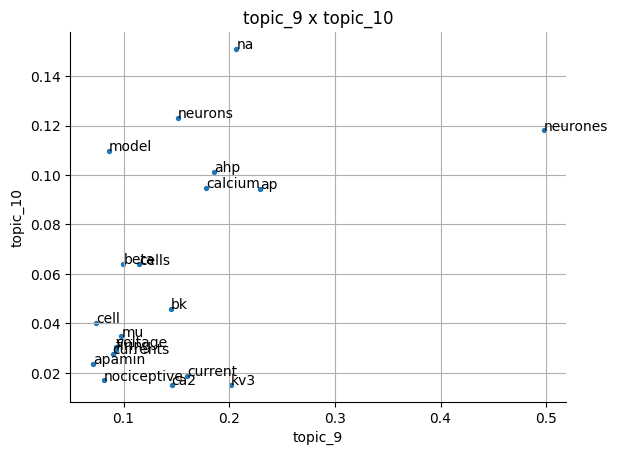

In [115]:
for comb in combs:
    
    fig, ax = plt.subplots()
    
    encoding_matrix_aux = encoding_matrix.sort_values(comb[0], ascending=False)
    enconding_matrix_aux = encoding_matrix_aux.iloc[:20]

    ax.scatter(list(encoding_matrix_aux[comb[0]])[:20], list(encoding_matrix_aux[comb[1]])[:20], s=8)
    
    for i, word in enumerate(enconding_matrix_aux.index):
        ax.annotate(word, (encoding_matrix_aux[comb[0]][i], encoding_matrix_aux[comb[1]][i]))
    
    ax.set_xlabel(comb[0])
    ax.set_ylabel(comb[1])
    ax.set_title(f'{comb[0]} x {comb[1]}')

    # plt.xlim(min(x_plot)-0.001,max(x_plot)+0.001)
    # plt.xlim(min(x_plot),max(x_plot))
    # plt.ylim(min(y_plot)-0.001,max(y_plot)+0.001)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid()

    plt.show()

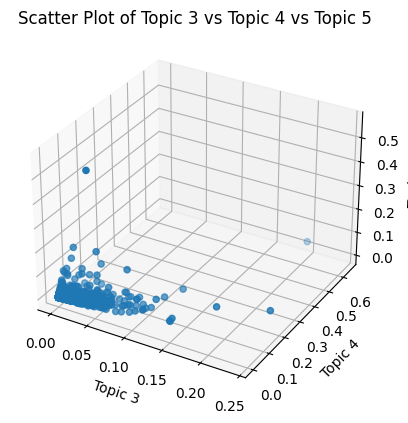

In [97]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_1"].values, encoding_matrix["topic_2"].values, encoding_matrix["topic_3"].values)

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_zlabel('Topic 5')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4 vs Topic 5')

plt.show()

##### k means

In [21]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)

c:\venv\ilumpy\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df_kmeans = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': abstracts})
print(df_kmeans.sort_values('labels'))

      labels                                               docs  \
925        0  SEPARATION OF NEURON TYPES IN THE GUSTATORY ZO...   
681        0  AGING OF NEURONS IN THE MOLLUSK LYMNAEA-STAGNA...   
1052       0  Role of a Ca2+-dependent slow afterhyperpolari...   
1058       0  Hyperpolarization-activated current (Ih) contr...   
672        0  Stimulus dynamics-dependent information transf...   
...      ...                                                ...   
483        9  Thresholds for activation of rabbit retinal, g...   
482        9  Neuropeptide Y is an essential in vivo develop...   
480        9  Amphetamine Paradoxically Augments Exocytotic ...   
490        9  Input timing for spatial processing is precise...   
0          9  Red pigment concentrating hormone strongly enh...   

                                               abstract  
925   1 . Whole-cell current-clamp recordings made n...  
681   aim study compare functional structural change...  
1052  determine inhib

In [36]:
df_kmeans.to_excel('topics.xlsx')

#### Aula 6

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'spacy'

In [37]:
import pandas as pd
training_corpus = pd.read_excel('topics.xlsx')#.dropna()

In [38]:
print('Training data size: {}'.format(len(training_corpus)))

Training data size: 1555


In [39]:
print(training_corpus['labels'])

0       9
1       5
2       9
3       3
4       8
       ..
1550    0
1551    5
1552    2
1553    9
1554    1
Name: labels, Length: 1555, dtype: int64


In [40]:
# The first post along with its corresponding label.
print(training_corpus['abstract'][0])

first_doc_label = training_corpus['labels'][0]
print('Corresponding topic: {}'.format(training_corpus['labels'][first_doc_label]))

neuropeptide , red pigment concentrating hormone ( RPCH ) , strengthened inhibitory synapse lateral pyloric ( LP ) neuron pyloric dilator ( PD ) neurons pyloric network stomatogastric ganglion ( STG ) lobster , Homarus americanus . RPCH produced several-fold increases amplitude action potential - mediated non - impulse-mediated transmission persisted long peptide remained present . LP PD synapse feedback pacemaker kernel pyloric network , consists electrically coupled two PD neurons anterior burster ( AB ) neuron , might expected strengthening LP PD synapse would increase period pyloric rhythm . However , period pyloric rhythm increased transiently RPCH , transient increase cycle period observed even LP neuron hyperpolarized . Phase response curves measured using dynamic clamp create artificial inhibitory inputs variable strength duration PD neurons . Synaptic conductance values seen normal saline ineffective changing pyloric period throughout pyloric cycle . Conductances similar seen 